# <b> IMPORTING LIBRARIES

In [34]:
# REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# csv file after initial feature engineering is imported

df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/post_initial_fe_dataset.csv")
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience
0,5065438,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,0,1,0,36.0,6.0
1,5142753,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,0,49.0,1.0
2,5111146,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,0,1,1,1,54.0,3.0
3,5010310,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,0,1,1,41.0,5.0
4,5010835,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,0,1,1,1,47.0,15.0


In [4]:
df.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE',
       'MARITAL_STATUS', 'HOUSE_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'JOB CATEGORY', 'BEGIN_MONTHS', 'STATUS OF LOAN',
       'TARGET', 'IS_MALE', 'OWNS_CAR', 'OWNS_PROPERTY', 'age',
       'years_of_experience'],
      dtype='object')

# <b> SMOTE FOR OVERSAMPLING

In [37]:
df["TARGET"].value_counts()

0    535705
1      1962
Name: TARGET, dtype: int64

In [35]:
# Apply SMOTE to the training set
X=df.drop("TARGET",axis=1)
y=df["TARGET"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

pd.Series(y_resampled).value_counts()

0    535705
1    535705
Name: TARGET, dtype: int64

In [38]:
X_resampled.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience
0,5065438,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,1,0,36.0,6.0
1,5142753,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,49.0,1.0
2,5111146,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,1,1,1,54.0,3.0
3,5010310,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,1,1,41.0,5.0
4,5010835,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,1,1,1,47.0,15.0


In [41]:
X_resampled["TARGET"]=y_resampled

In [45]:
df=X_resampled
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,MARITAL_STATUS,HOUSE_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB CATEGORY,BEGIN_MONTHS,STATUS OF LOAN,IS_MALE,OWNS_CAR,OWNS_PROPERTY,age,years_of_experience,TARGET
0,5065438,2.0,270000.0,0.0,0.0,1.0,0,0,0,10,-6,6.0,0,1,0,36.0,6.0,0
1,5142753,0.0,81000.0,0.0,1.0,0.0,1,1,0,12,-4,0.0,0,0,0,49.0,1.0,0
2,5111146,0.0,270000.0,1.0,0.0,0.0,0,1,0,8,0,6.0,1,1,1,54.0,3.0,0
3,5010310,1.0,112500.0,0.0,0.0,0.0,0,0,0,3,-3,0.0,0,1,1,41.0,5.0,0
4,5010835,2.0,139500.0,0.0,0.0,0.0,1,0,0,4,-29,0.0,1,1,1,47.0,15.0,0


In [46]:
df['TARGET'].value_counts()

0    535705
1    535705
Name: TARGET, dtype: int64

# <u> <b> NUMERICAL COLUMNS

# <ul>1.  AMT_INCOME_TOTAL


    inference : presence of outliers

In [47]:
df['AMT_INCOME_TOTAL'].skew()

2.189908068230824

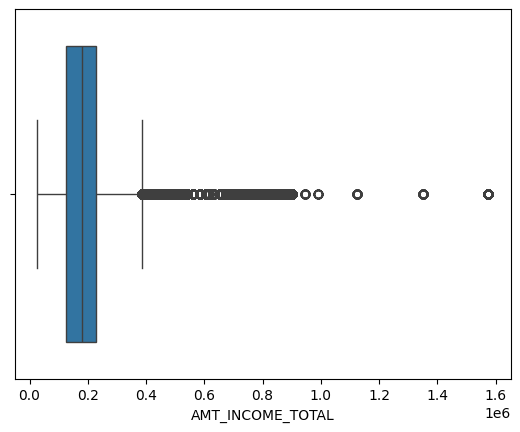

In [48]:
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.show()

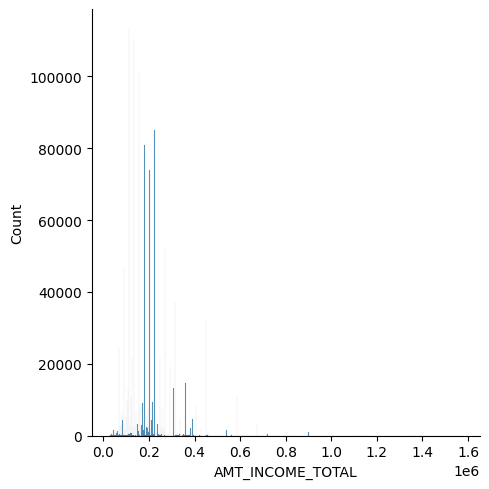

In [49]:
sns.displot(x=df['AMT_INCOME_TOTAL'])
plt.show()

# <ul>2. BEGIN_MONTHS

    inference : absence of outliers

In [50]:
df["BEGIN_MONTHS"].skew()

-0.5417669483059803

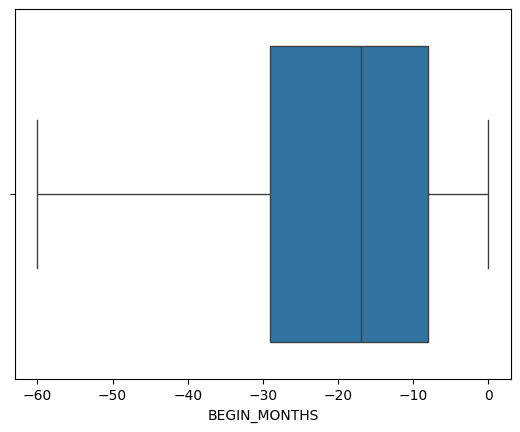

In [51]:
sns.boxplot(x=df['BEGIN_MONTHS'])
plt.show()

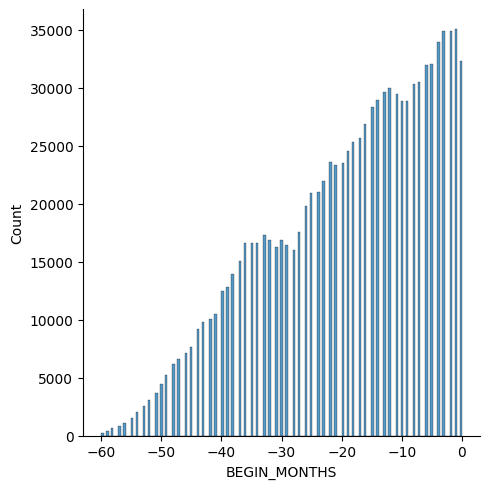

In [52]:
sns.displot(x=df['BEGIN_MONTHS'])
plt.show()

# <ul>3. 'age'

    inference : absence of outliers

In [53]:
df["age"].skew()

0.014536433699692533

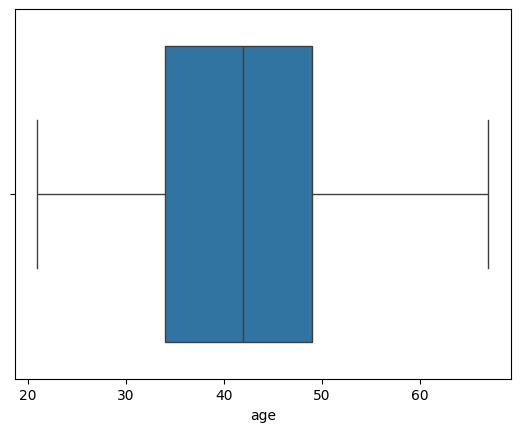

In [54]:
sns.boxplot(x=df['age'])
plt.show()

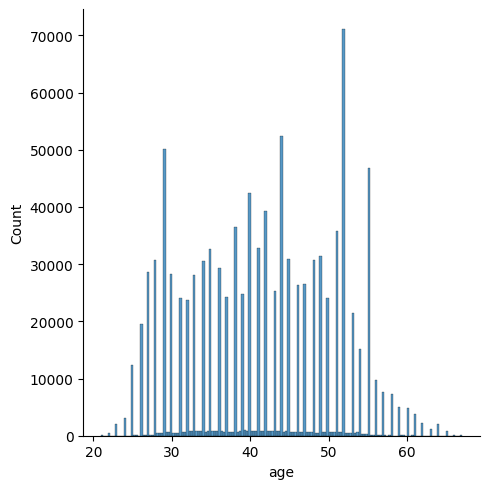

In [55]:
sns.displot(x=df['age'])
plt.show()

# <ul> 4. years_of_experience

    inference : outlier present outside IQR range

In [56]:
df["years_of_experience"].skew()

1.8136516205952653

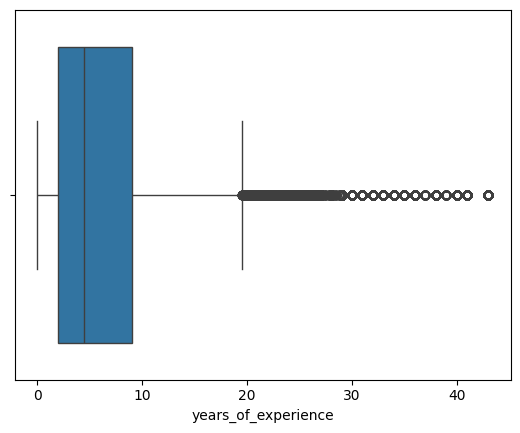

In [57]:
sns.boxplot(x=df['years_of_experience'])
plt.show()

In [58]:
df['years_of_experience'].max()

43.0

In [59]:
df["years_of_experience"].value_counts().sort_index()

0.000000     37099
0.000064         1
0.000131         1
0.000219         1
0.000287         1
             ...  
38.000000      236
39.000000       83
40.000000      422
41.000000      482
43.000000      133
Name: years_of_experience, Length: 60188, dtype: int64

# <b> CATEGORICAL COLUMNS

# <ul> 1. 'CNT_CHILDREN'

In [28]:
df['CNT_CHILDREN'].value_counts()

0.0    343151
1.0    127695
2.0     66821
Name: CNT_CHILDREN, dtype: int64

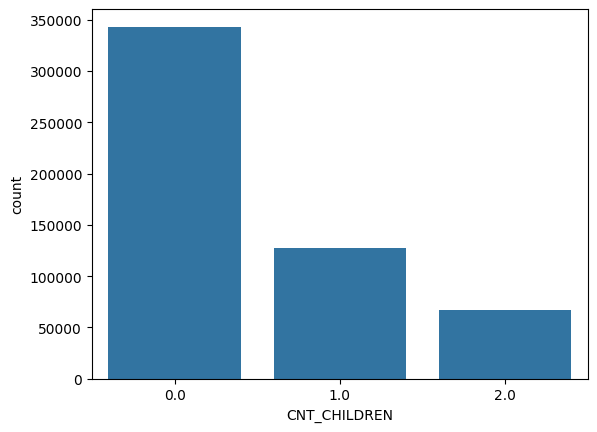

In [27]:
sns.countplot(x='CNT_CHILDREN', data=df)
plt.show()

In [30]:
cross_tab = pd.crosstab(df['CNT_CHILDREN'], df['TARGET'], normalize='index')
cross_tab

# 1 indicates risk user


TARGET,0,1
CNT_CHILDREN,,
0.0,0.996535,0.003465
1.0,0.995403,0.004597
2.0,0.997216,0.002784


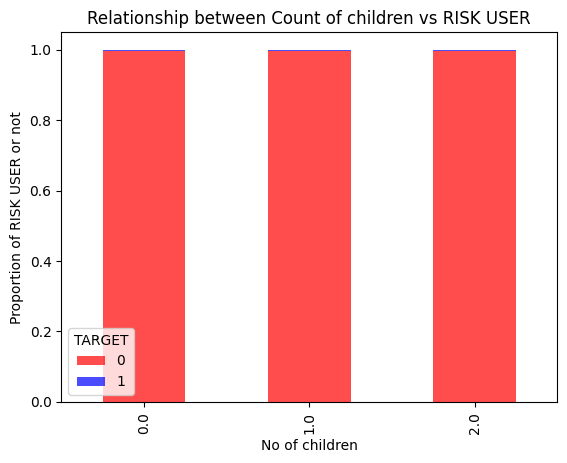

In [32]:
ax = cross_tab.plot(kind='bar', stacked=True, color=['red', 'blue'], alpha=0.7)
ax.set_ylabel('Proportion of RISK USER or not')
ax.set_xlabel('No of children')

plt.title('Relationship between Count of children vs RISK USER')
plt.show()

INFERENCE : NO of risk users are very less due to class imbalance problem

#spare columns

In [ ]:
[#'ID', 'CNT_CHILDREN', #'AMT_INCOME_TOTAL',
 'NAME_EDUCATION_TYPE',
       'MARITAL_STATUS', 'HOUSE_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'JOB CATEGORY', #'BEGIN_MONTHS',
 'STATUS OF LOAN',
       'TARGET', 'IS_MALE', 'OWNS_CAR', 'OWNS_PROPERTY',#'age',
       #'years_of_experience'
 ]

In [60]:
# Exporting the dataset
# Assuming df is your DataFrame
df.to_csv('/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/oversampled_dataset.csv', index=False)